### **1**

1. Defina dos listas de valores `x` e `y`, tal que los pares (x,y) cumplan una relación lineal del tipo $y = 2x + 1$. Defina la lista de valores de `x` con 100 puntos en el intervalo de valores que van desde -1 hasta 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y = 2*x + 1


2. Grafique la curva generada por los valores (x,y) en color verde, con un ancho `linewidth = 3` y que sea una línea a trazos `linestyle = '--'`. Agregue al gráfico el título 'Relación Lineal'.

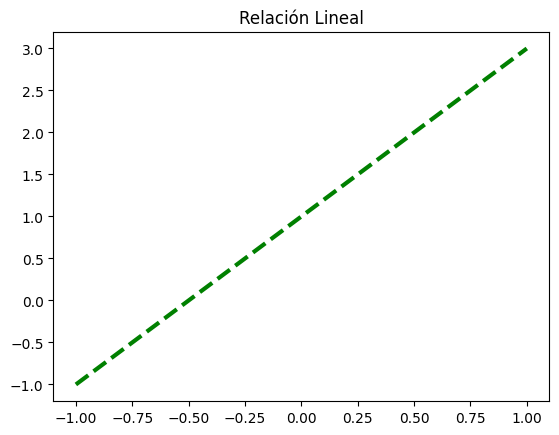

In [2]:
#2. Grafique la curva generada por los valores (x,y) en color verde, con un ancho `linewidth = 3` y que sea una línea a trazos `linestyle = '--'`. Agregue al gráfico el título 'Relación Lineal'.

# Path: Homework_estudiantes.ipynb

plt.plot(x,y, color = 'green', linewidth = 3, linestyle = '--') # Se grafica la curva con los valores (x,y) en color verde, 
                                        #con un ancho linewidth = 3 y que sea una línea a trazos linestyle = '--'

plt.title('Relación Lineal')
plt.show()


### **2**

Graficar tres subplots, con las curvas (x1,y1),(x2,y2) y (x3,y3), en una única figura. Apilar los subplots en forma vertical y de manera que compartan el eje x.

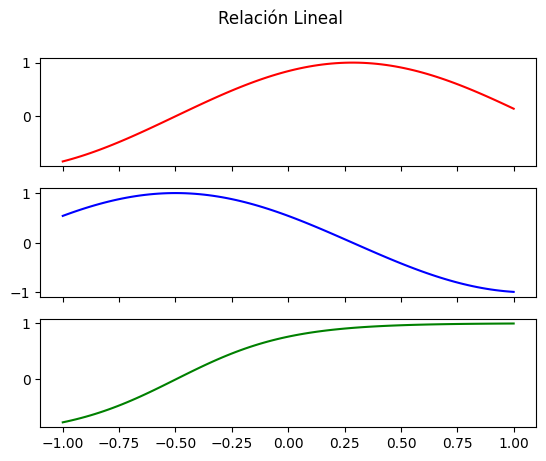

In [14]:
# Graficar tres subplots, con las curvas (x1,y1),(x2,y2) y (x3,y3), en una única figura. Apilar los subplots en forma vertical y de manera que compartan el eje x.

# Path: Homework_estudiantes.ipynb

x1 = np.linspace(-1,1,100)
y1 = 2*x1 + 1

x2 = x1
y2 = y1

x3 = x1
y3 = y1

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = True) # sharex = True para compartir el eje x entre los subplots
# sharey = True para compartir el eje y entre los subplots
fig.suptitle('Relación Lineal') # Título de la figura
ax1.plot(x1,np.sin(y), color = 'red')
ax2.plot(x2,np.cos(y2),color = 'blue')
ax3.plot(x3,np.tanh(y3),color = 'green')
plt.show()


### **3**
1. ¿Por qué cree que se forman esas líneas horizontales en el gráfico?
2. ¿Qué conclusiones pueden sacar sobre la relación de precio y puntaje observando este gráfico?
3. Tome solo los vinos realizados en Argentina (recuerde usar una máscara) y realice nuevamente un scatter plot de precio vs puntaje para estos vinos.

Scatter plot es un gráfico de dispersión, es decir, un gráfico que nos permite ver la relación entre dos variables. En este caso, la relación entre el precio y el puntaje de los vinos.

**Respuestas**

1
- las lineas horizontales se forman por que hay muchos vinos con el mismo precio y puntaje por lo que se repiten los puntos en el grafico. 
 - Tienen el mismo puntaje pero distintos precios
- Tienen el mismo precio pero distintos puntajes

2 
- hablar de la dificultad de entender
- existen precios que se traslapan con puntajes
- existen puntajes que se traslapan con precios



In [4]:
import pandas as pd
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']
# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('wine_reviews.csv', usecols = fields)

In [5]:
ARG_wine_reviews = wine_reviews[wine_reviews['country']=='Argentina'] # Seleccionamos solo los vinos de Argentina
ARG_wine_reviews.head()

,country,points,price,variety
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
183,Argentina,88,12.0,Torrontés
224,Argentina,90,22.0,Malbec
231,Argentina,85,10.0,Bonarda


In [6]:
# Tomamos como coordenadas en x los precios
precio_arg = ARG_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_arg = ARG_wine_reviews.points.values

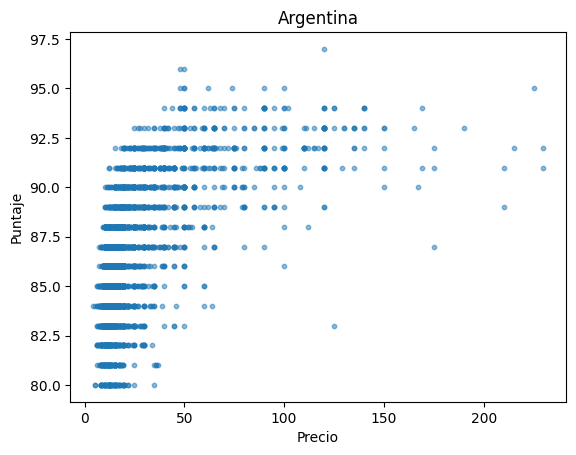

In [7]:
fig,ax = plt.subplots()
ax.scatter(precio_arg,puntos_arg, marker = 'o', s = 10, alpha = 0.5, label = 'Argentina')
ax.set_title('Argentina')
ax.set_xlabel('Precio')
ax.set_ylabel('Puntaje')
plt.show()

### **4**
### Actividad referente al notebook matplotlib visualización.
 
1. Repitan el histograma anterior, pero esta vez cambiando el número de `bins`. Por ejemplo, probar con 5, 50, 500 y 5000. ¿Cuál les parece la opción más adecuada? ¿De qué dependará el número de bins adecuado a seleccionar?

2. Prueben qué sucede si no le pasan el argumento `bins` a la función. Busquen en la bibliografía de la librería que es lo que hace por default la función.

In [8]:
mu = 20
sigma = 4
valores = mu + sigma * np.random.randn(10000)

In [9]:
#mu,sigma, valores= 20,4, mu + sigma * np.random.randn(10000)

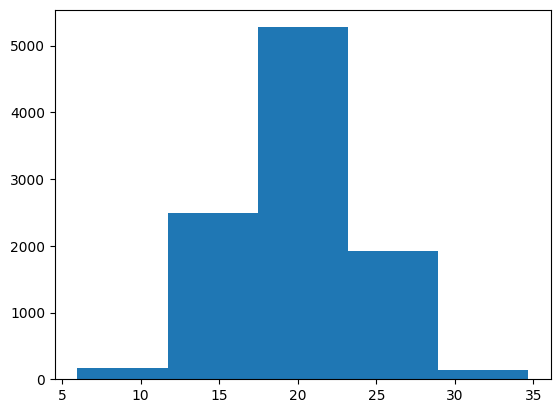

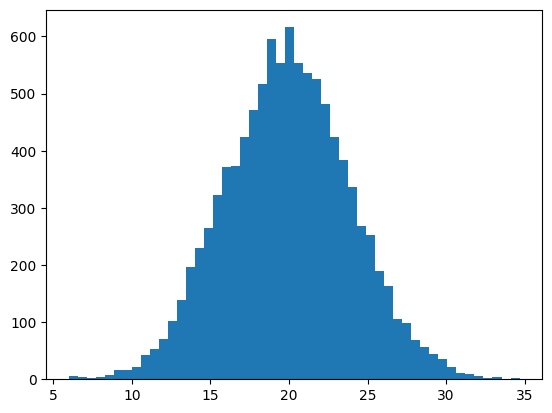

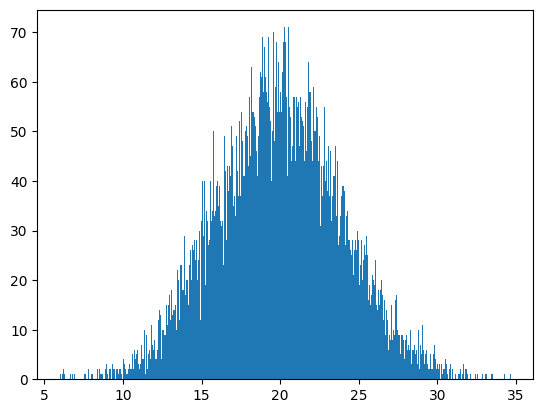

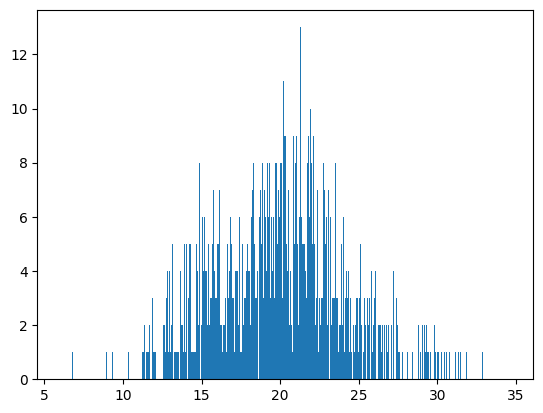

In [10]:
# cantidad de bins a tomar
for i in [5,50,500,5000]:
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Ploteamos el histograma
    n, bins, _ = ax.hist(valores, bins = i)

**Nota**: la función `hist` además nos devuelve dos vectores relevantes. El vector `n` donde nos especifica el número de cuentas de cada bin (columna) del histograma. Y el vector `bins`, que nos dice los límites de estos bines (donde empieza y termina cada columna. Noten que el vector 'bins' tiene un largo igual a `len(n)+1`.

Como último ejemplo, vamos a graficar el histograma de precios correspondientes a los vinos argentinos con una calificación de 85 y los vamos a comparar al precio de los vinos argentinos con una calificación de 90.

In [11]:
def valores_85_90_ARGWINE(data,x,y):
    ARG_wine_85=data[data['points']==x]
    ARG_wine_90=data[data['points']==y]
    precios_arg_85 = ARG_wine_85.price.values
    precios_arg_90 = ARG_wine_90.price.values
    print('Cantidad de vinos de',x,':',len(precios_arg_85))
    print('Cantidad de vinos de',y,':',len(precios_arg_90))
    return precios_arg_85,precios_arg_90

In [12]:
precios_arg_85,precios_arg_90=valores_85_90_ARGWINE(ARG_wine_reviews,85,90)

Cantidad de vinos de 85 : 422
Cantidad de vinos de 90 : 251


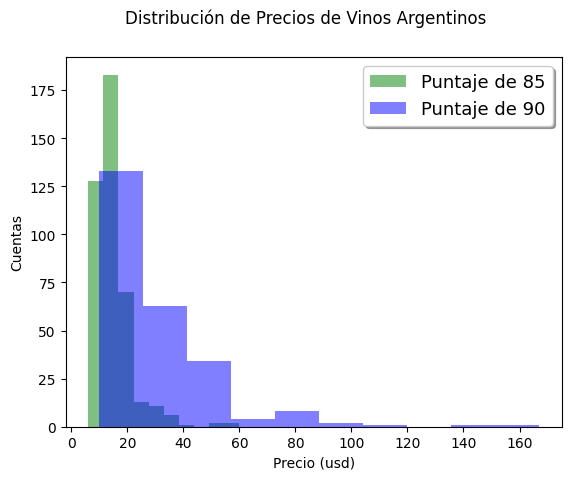

In [13]:
def bins_85_90_histograma(precios_arg_85, precios_arg_90, n_bins_85, n_bins_90):
    fig,ax = plt.subplots()
    fig.suptitle('Distribución de Precios de Vinos Argentinos')
    ax.hist(precios_arg_85, n_bins_85, facecolor='g', alpha=0.5, label='Puntaje de 85')
    ax.hist(precios_arg_90, n_bins_90, facecolor='b', alpha=0.5, label='Puntaje de 90')
    ax.set(xlabel='Precio (usd)', ylabel='Cuentas')
    ax.legend(loc='upper right', shadow=True, fontsize=13)
    plt.show()

bins_85_90_histograma(precios_arg_85, precios_arg_90, 10, 10)